# House Price Predictor Challenge

__Library Versions__:  
* numpy = 1.18.5
* pandas = 1.0.5
* scikit-learn = 0.23.1
* matplotlib = 3.2.2

# <center>Dataset Formatting</center>

In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

# A. Load Data

In [ ]:
train_data = pd.read_csv('train.csv')

In [ ]:
train_data.head(5)

,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,64,65,60,RL,NaN,9375,Pave,NaN,Reg,Lvl,...,0,NaN,GdPrv,NaN,0,2,2009,WD,Normal,219500
1,651,652,70,RL,60.0,9084,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,10,2009,WD,Normal,108000
2,260,261,80,RL,120.0,19296,Pave,NaN,Reg,Lvl,...,0,NaN,GdWo,NaN,0,5,2009,WD,Normal,176000
3,1089,1090,120,FV,37.0,3316,Pave,Pave,IR1,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,197000
4,1112,1113,20,RL,73.0,7100,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,129900


__Target Feature: SalePrice__

# B. Exploratory Data Analysis (EDA)

In [ ]:
train_data.shape

(1022, 82)

In [ ]:
data_types = train_data.dtypes
all_dtypes = set(data_types)
print(data_types)
print(f'All Data Types Seen in Dataframe: {all_dtypes}')

Unnamed: 0         int64
Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 82, dtype: object
All Data Types Seen in Dataframe: {dtype('O'), dtype('int64'), dtype('float64')}


In [ ]:
train_data.describe()

,Unnamed: 0,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1022.000000,1022.000000,1022.000000,842.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1015.000000,...,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000
mean,729.223092,730.223092,56.149706,70.261283,10306.330724,6.112524,5.564579,1971.557730,1984.930528,102.175369,...,93.991194,44.808219,20.854207,3.811155,15.141879,2.869863,29.015656,6.389432,2007.820939,181123.119374
std,428.530232,428.530232,41.215899,24.847801,9635.841640,1.404505,1.110557,29.823413,20.930978,179.987735,...,125.412155,62.973390,60.358181,31.177269,55.037574,41.479727,310.960859,2.728133,1.313022,81038.559207
min,0.000000,1.000000,20.000000,21.000000,1477.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,35311.000000
25%,351.250000,352.250000,20.000000,60.000000,7500.000000,5.000000,5.000000,1953.000000,1966.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129125.000000
50%,740.000000,741.000000,50.000000,70.000000,9410.500000,6.000000,5.000000,1972.000000,1994.000000,0.000000,...,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,165000.000000
75%,1099.750000,1100.750000,70.000000,80.000000,11433.250000,7.000000,6.000000,2001.000000,2004.000000,164.500000,...,168.000000,65.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,1459.000000,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,736.000000,502.000000,552.000000,508.000000,396.000000,738.000000,8300.000000,12.000000,2010.000000,755000.000000


In [ ]:
train_data.isnull().sum()

Unnamed: 0         0
Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      180
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 82, dtype: int64

In [ ]:
train_data_num = train_data.select_dtypes(include='number') # all numerical data
train_data_cat = train_data.select_dtypes(include='object') # all categorical data

In [ ]:
train_data_num.head(5)

,Unnamed: 0,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,64,65,60,NaN,9375,7,5,1997,1998,573.0,...,576,36,0,0,0,0,0,2,2009,219500
1,651,652,70,60.0,9084,4,5,1940,1950,0.0,...,120,0,0,0,0,0,0,10,2009,108000
2,260,261,80,120.0,19296,6,5,1962,1962,399.0,...,0,0,252,0,0,0,0,5,2009,176000
3,1089,1090,120,37.0,3316,8,5,2005,2005,0.0,...,0,84,0,0,0,0,0,4,2006,197000
4,1112,1113,20,73.0,7100,5,7,1957,1957,0.0,...,0,0,0,0,0,0,0,7,2006,129900


In [ ]:
train_data_cat.head(5)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,GdPrv,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Artery,...,Detchd,Unf,Fa,Po,P,NaN,MnPrv,NaN,WD,Normal
2,RL,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Artery,...,Attchd,Unf,TA,TA,Y,NaN,GdWo,NaN,WD,Normal
3,FV,Pave,Pave,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,...,Attchd,Fin,TA,TA,Y,NaN,NaN,NaN,WD,Normal
4,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [ ]:
# dictionary that stores all possible values each categorical feature can have
categorical_features_values = dict() # form {feature: [values]}
categorical_features = train_data_cat.columns.tolist()

for feature in categorical_features:
    curr_values = train_data_cat[feature]
    if feature not in categorical_features_values:
        categorical_features_values[feature] = list(set(curr_values))
# outputting for confirmation
for feature in categorical_features_values.keys():
    print(f'{feature}: {categorical_features_values[feature]}')

MSZoning: ['RL', 'RM', 'C (all)', 'FV', 'RH']
Street: ['Grvl', 'Pave']
Alley: [nan, 'Grvl', 'Pave']
LotShape: ['IR1', 'IR2', 'IR3', 'Reg']
LandContour: ['HLS', 'Lvl', 'Low', 'Bnk']
Utilities: ['AllPub', 'NoSeWa']
LotConfig: ['Inside', 'Corner', 'FR3', 'FR2', 'CulDSac']
LandSlope: ['Mod', 'Gtl', 'Sev']
Neighborhood: ['CollgCr', 'Crawfor', 'NPkVill', 'Edwards', 'StoneBr', 'SawyerW', 'Somerst', 'BrkSide', 'Blmngtn', 'NridgHt', 'ClearCr', 'MeadowV', 'SWISU', 'Mitchel', 'Gilbert', 'NAmes', 'NoRidge', 'BrDale', 'Sawyer', 'NWAmes', 'Timber', 'Veenker', 'IDOTRR', 'OldTown']
Condition1: ['Norm', 'Artery', 'RRNe', 'RRAn', 'RRNn', 'PosA', 'Feedr', 'RRAe', 'PosN']
Condition2: ['Norm', 'Artery', 'RRNn', 'RRAn', 'PosA', 'Feedr', 'RRAe', 'PosN']
BldgType: ['1Fam', 'Twnhs', '2fmCon', 'TwnhsE', 'Duplex']
HouseStyle: ['2.5Unf', '1.5Unf', '2.5Fin', '1Story', '2Story', 'SLvl', '1.5Fin', 'SFoyer']
RoofStyle: ['Hip', 'Shed', 'Mansard', 'Flat', 'Gable', 'Gambrel']
RoofMatl: ['CompShg', 'WdShake', 'Membran', 

## B.1. Visualization

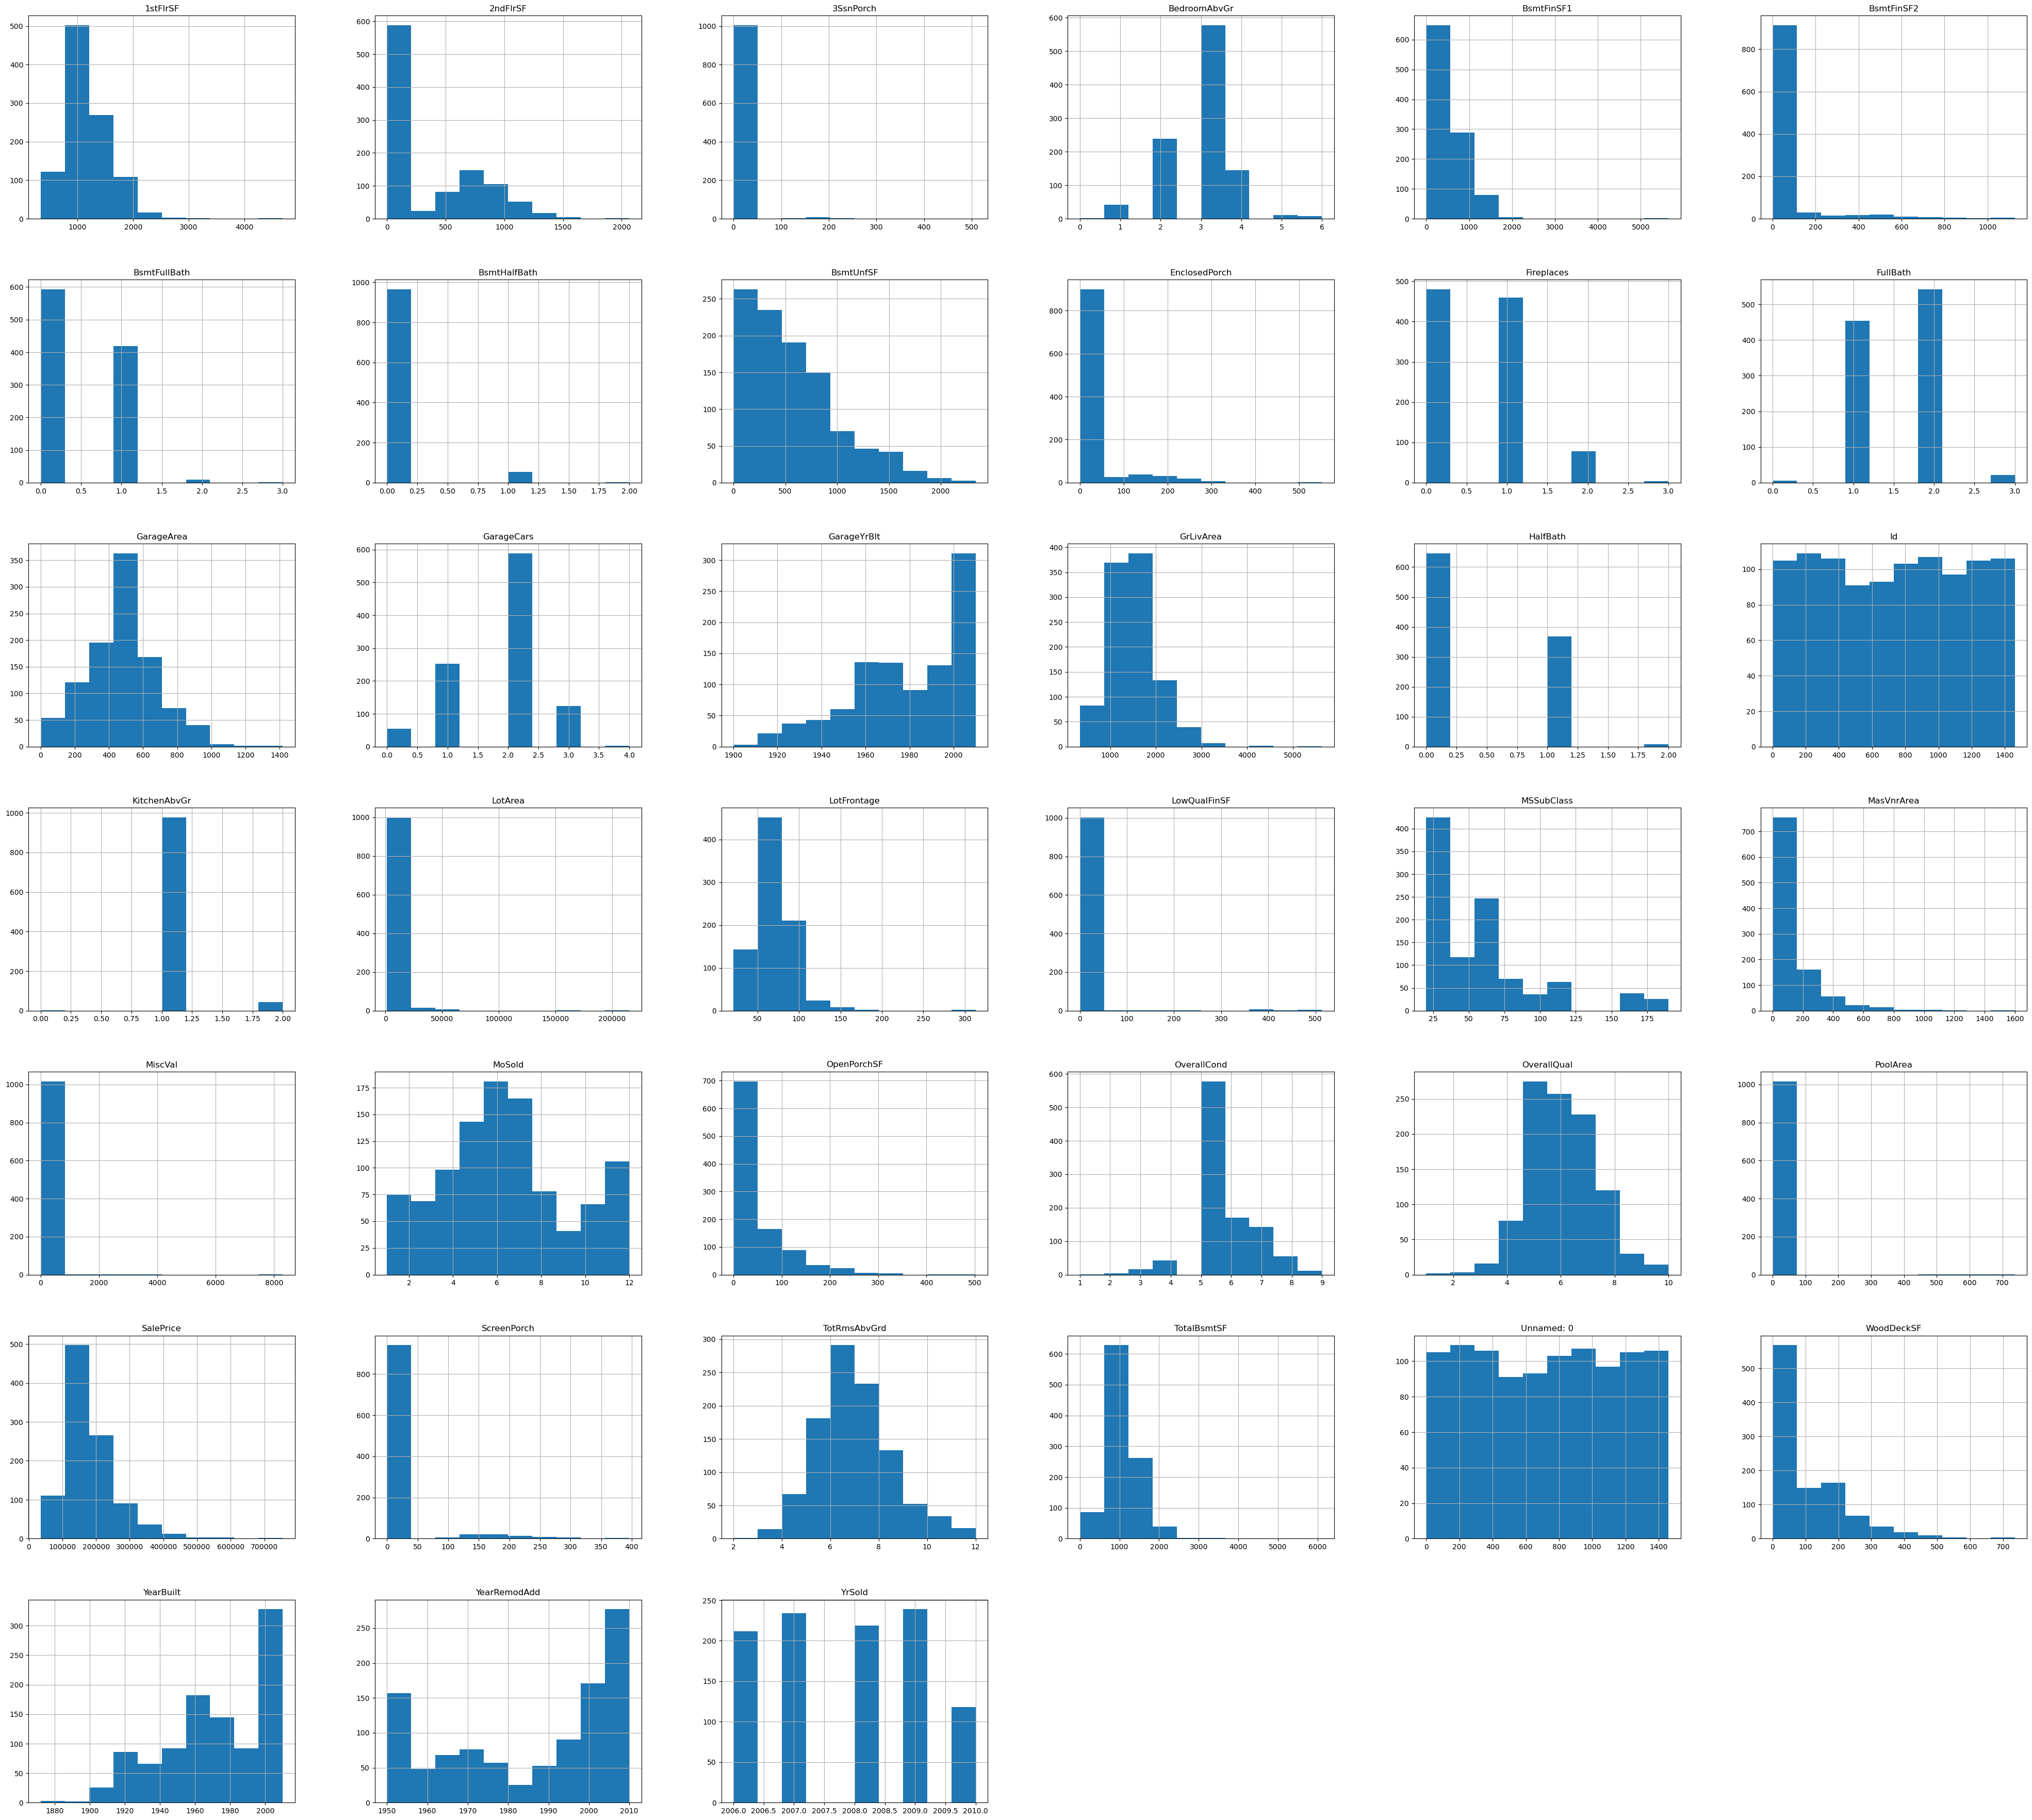

In [ ]:
train_data_num.hist(figsize=(50,45))
plt.show()

## B.2. Correlation between features and to the target

In [ ]:
import pandas as pd
import numpy as np
# function to get top n correlated features in dataframe
def get_top_n_pairs(data, n):
    corr_matrix = data.corr() # make correlation matrix
    upper_corr_matrix = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)) # getting upper triangle of diagonal correlation matrix
    top_pairs = upper_corr_matrix.unstack().sort_values(ascending=False)
    corr_feats = top_pairs.index # all correlated features as a list of tuples, corresponds with each index in top_pairs
    feature_pairs = []
    found_pairs = []

    # get top n correlations without self-correlations
    for i, feats in enumerate(corr_feats):
        feat1, feat2 = feats # getting features
        curr_pair = (feat1,feat2)
        if feat1 != feat2: # unique features
            corr_coef = top_pairs.iloc[i]
            curr_pair = {
                'feature1': feat1,
                'feature2': feat2,
                'corr_coef': corr_coef
            }
            feature_pairs.append(curr_pair) # adding pair
        if len(feature_pairs) >= n: # top n pairs found
            break

    top_n_pairs = pd.DataFrame(feature_pairs)
    return top_n_pairs

In [ ]:
num_corr_matrix = train_data_num.corr()
num_corr_matrix

,Unnamed: 0,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Unnamed: 0,1.000000,1.000000,0.020601,-0.008556,-0.020780,-0.043831,0.034368,-0.029693,-0.026938,-0.074635,...,-0.014444,-0.011974,0.002291,-0.055276,-0.000717,0.044971,0.032461,0.026769,0.007493,-0.035452
Id,1.000000,1.000000,0.020601,-0.008556,-0.020780,-0.043831,0.034368,-0.029693,-0.026938,-0.074635,...,-0.014444,-0.011974,0.002291,-0.055276,-0.000717,0.044971,0.032461,0.026769,0.007493,-0.035452
MSSubClass,0.020601,0.020601,1.000000,-0.373607,-0.124742,0.026357,-0.031848,0.042593,0.041089,0.013079,...,-0.008853,-0.005434,-0.008826,-0.048738,-0.026453,0.004476,0.054863,0.010517,-0.030579,-0.076696
LotFrontage,-0.008556,-0.008556,-0.373607,1.000000,0.421802,0.260225,-0.072904,0.150409,0.108385,0.196978,...,0.073216,0.149874,0.018884,0.067799,0.034335,0.282610,-0.010806,-0.017467,0.043164,0.349727
LotArea,-0.020780,-0.020780,-0.124742,0.421802,1.000000,0.096962,-0.005310,0.027849,0.001240,0.076046,...,0.168786,0.081565,-0.011834,0.026166,0.053763,0.105920,0.048971,-0.005756,0.027135,0.257302
OverallQual,-0.043831,-0.043831,0.026357,0.260225,0.096962,1.000000,-0.076561,0.593542,0.560552,0.411046,...,0.225199,0.305624,-0.112858,0.032762,0.056620,0.081268,-0.057210,0.097189,-0.034738,0.789634
OverallCond,0.034368,0.034368,-0.031848,-0.072904,-0.005310,-0.076561,1.000000,-0.376826,0.073108,-0.115982,...,0.018657,-0.037594,0.044538,0.031313,0.033156,-0.000934,0.027193,-0.008955,0.051261,-0.083465
YearBuilt,-0.029693,-0.029693,0.042593,0.150409,0.027849,0.593542,-0.376826,1.000000,0.613311,0.321934,...,0.219889,0.214276,-0.358656,0.025868,-0.030450,0.000885,-0.040594,0.039051,-0.017657,0.542773
YearRemodAdd,-0.026938,-0.026938,0.041089,0.108385,0.001240,0.560552,0.073108,0.613311,1.000000,0.192762,...,0.191996,0.244228,-0.197826,0.047774,-0.031400,0.016875,-0.037565,0.042977,0.033118,0.510283
MasVnrArea,-0.074635,-0.074635,0.013079,0.196978,0.076046,0.411046,-0.115982,0.321934,0.192762,1.000000,...,0.150067,0.113474,-0.114024,0.011769,0.068400,0.019292,-0.045857,0.000266,0.004959,0.475568


In [ ]:
num_corr_matrix['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.789634
GrLivArea        0.719985
GarageCars       0.634395
GarageArea       0.626319
TotalBsmtSF      0.612676
1stFlrSF         0.611725
FullBath         0.570163
TotRmsAbvGrd     0.555989
YearBuilt        0.542773
YearRemodAdd     0.510283
GarageYrBlt      0.483741
Fireplaces       0.475610
MasVnrArea       0.475568
BsmtFinSF1       0.398335
LotFrontage      0.349727
OpenPorchSF      0.317960
2ndFlrSF         0.308750
WoodDeckSF       0.308526
HalfBath         0.284235
LotArea          0.257302
BsmtFullBath     0.226761
BsmtUnfSF        0.218188
BedroomAbvGr     0.175139
PoolArea         0.116425
ScreenPorch      0.103018
MoSold           0.060779
3SsnPorch        0.032842
BsmtFinSF2      -0.004278
BsmtHalfBath    -0.015511
YrSold          -0.024045
MiscVal         -0.029293
Id              -0.035452
Unnamed: 0      -0.035452
MSSubClass      -0.076696
LowQualFinSF    -0.079848
OverallCond     -0.083465
EnclosedPorch   -0.128401
KitchenAbvGr

Finding most correlated numerical features

In [ ]:
top_num_pairs_df = get_top_n_pairs(train_data_num, 50)
print(top_num_pairs_df.shape)
display(top_num_pairs_df)

(50, 3)


,feature1,feature2,corr_coef
0,Id,Unnamed: 0,1.000000
1,GarageArea,GarageCars,0.880635
2,GarageYrBlt,YearBuilt,0.832789
3,TotRmsAbvGrd,GrLivArea,0.823392
4,1stFlrSF,TotalBsmtSF,0.811504
5,SalePrice,OverallQual,0.789634
6,SalePrice,GrLivArea,0.719985
7,TotRmsAbvGrd,BedroomAbvGr,0.670701
8,GrLivArea,2ndFlrSF,0.659462
9,GarageYrBlt,YearRemodAdd,0.645595


# C. Examining Missing Values

In [ ]:
# prints out the percentage of missing observation for each feature sorted in descending order
def print_null_features(X):
    null_val = (X.isnull().sum().sort_values(ascending=False) / len(X)).to_string()
    print(null_val)

In [ ]:
# Returns dictionary of features with the number of missing data
def null_columns(X):
    obj = X.isnull().sum()
    dict_null = {}
    # depending on your pandas choose one line
#     for key,value in obj.items(): # for pandas v 2.0 and above
    for key,value in obj.iteritems(): # for pandas versions below v 2.0
        if value != 0:
            dict_null[key] = value
    return dict_null

In [ ]:
# function returns the features with missing value percentage above threshold
# data: dataframe being examined
# threshold: float from 0 to 1 representing the percentage of missing observations that needs to be exceeded to drop the feature
def features_above_threshold(data, threshold):
    dict_null = null_columns(data)
    above_threshold = []
    for key, value in dict_null.items():
        if value >= train_data.shape[0]*threshold:
            above_threshold.append(key)
#             print(key, ":", value)
    return [dict_null, above_threshold]

__Importing Test Data to Examine It's missing Values__

Note: Even though we are looking at the test data, all processing of test data will be based upon the train data

In [ ]:
test_data = pd.read_csv('test.csv')
test_data_num = test_data.select_dtypes(include='number')
test_data_cat = test_data.select_dtypes(include='object')

## C.1: Numerical Data

### Train

In [ ]:
print(f'numerical training data: {train_data_num.shape}')

numerical training data: (1022, 39)


In [ ]:
print(null_columns(train_data_num))

{'LotFrontage': 180, 'MasVnrArea': 7, 'GarageYrBlt': 54}


In [ ]:
print_null_features(train_data_num)

LotFrontage      0.176125
GarageYrBlt      0.052838
MasVnrArea       0.006849
BsmtFinSF1       0.000000
LowQualFinSF     0.000000
2ndFlrSF         0.000000
1stFlrSF         0.000000
TotalBsmtSF      0.000000
BsmtUnfSF        0.000000
BsmtFinSF2       0.000000
SalePrice        0.000000
BsmtFullBath     0.000000
YearRemodAdd     0.000000
YearBuilt        0.000000
OverallCond      0.000000
OverallQual      0.000000
LotArea          0.000000
MSSubClass       0.000000
Id               0.000000
GrLivArea        0.000000
BsmtHalfBath     0.000000
YrSold           0.000000
FullBath         0.000000
MoSold           0.000000
MiscVal          0.000000
PoolArea         0.000000
ScreenPorch      0.000000
3SsnPorch        0.000000
EnclosedPorch    0.000000
OpenPorchSF      0.000000
WoodDeckSF       0.000000
GarageArea       0.000000
GarageCars       0.000000
Fireplaces       0.000000
TotRmsAbvGrd     0.000000
KitchenAbvGr     0.000000
BedroomAbvGr     0.000000
HalfBath         0.000000
Unnamed: 0  

In [ ]:
drop_features = features_above_threshold(train_data_num, 0.8)
print(drop_features)

[{'LotFrontage': 180, 'MasVnrArea': 7, 'GarageYrBlt': 54}, []]


Looking at the numerical training data we can come to the following conclusions:  
* the amount of missing data does not warrant dropping any features
* the features with missing observations are 'LotFrontage', 'MasVnrArea', and 'GarageYrBlt'

In [ ]:
from scipy.stats import ks_2samp
missing_values = ['LotFrontage', 'GarageYrBlt', 'MasVnrArea']

for feature in missing_values:
    print(feature)
    print(f'\tMedian: {ks_2samp(train_data[feature].dropna(),train_data[feature].fillna(train_data[feature].median()))}')
    print(f'\tMean: {ks_2samp(train_data[feature].dropna(),train_data[feature].fillna(train_data[feature].mean()))}\n')

LotFrontage
	Median: KstestResult(statistic=0.08785344743435396, pvalue=0.0014803554190448986)
	Mean: KstestResult(statistic=0.09914889067591375, pvalue=0.00020752818133140671)

GarageYrBlt
	Median: KstestResult(statistic=0.02630961815270657, pvalue=0.8686380331617021)
	Mean: KstestResult(statistic=0.02707379793307564, pvalue=0.8456083650375467)

MasVnrArea
	Median: KstestResult(statistic=0.0027802145893785005, pvalue=1.0)
	Mean: KstestResult(statistic=0.0046426884405155544, pvalue=1.0)



The missing values for "LotFrontage" should not be imputed since they account for 18% of the feature data available, and the p-values of the K-S tests are less than 0.05, meaning the null hypotheses (distributions for the missing values removed vs. values imputed with the mean or median are identical) are rejected.  
Therefore, the missing "LotFrontage" values should be dropped.  
However, dropping rows with missing values from 'LotFrontage' would result in losing over 10% of the total observations which could significantly impact the overall model.  
For this reason, the missing 'LotFrontage' values will be imputed with the median. This will also be applied to the other missing numerical features

### Test

In [ ]:
print(f'numerical test data: {test_data_num.shape}')

numerical test data: (438, 39)


In [ ]:
print(null_columns(test_data_num))

{'LotFrontage': 79, 'MasVnrArea': 1, 'GarageYrBlt': 27}


In [ ]:
print_null_features(test_data_num)

LotFrontage      0.180365
GarageYrBlt      0.061644
MasVnrArea       0.002283
BsmtFinSF1       0.000000
LowQualFinSF     0.000000
2ndFlrSF         0.000000
1stFlrSF         0.000000
TotalBsmtSF      0.000000
BsmtUnfSF        0.000000
BsmtFinSF2       0.000000
SalePrice        0.000000
BsmtFullBath     0.000000
YearRemodAdd     0.000000
YearBuilt        0.000000
OverallCond      0.000000
OverallQual      0.000000
LotArea          0.000000
MSSubClass       0.000000
Id               0.000000
GrLivArea        0.000000
BsmtHalfBath     0.000000
YrSold           0.000000
FullBath         0.000000
MoSold           0.000000
MiscVal          0.000000
PoolArea         0.000000
ScreenPorch      0.000000
3SsnPorch        0.000000
EnclosedPorch    0.000000
OpenPorchSF      0.000000
WoodDeckSF       0.000000
GarageArea       0.000000
GarageCars       0.000000
Fireplaces       0.000000
TotRmsAbvGrd     0.000000
KitchenAbvGr     0.000000
BedroomAbvGr     0.000000
HalfBath         0.000000
Unnamed: 0  

In [ ]:
features_above_threshold(test_data_num, 0.8)

[{'LotFrontage': 79, 'MasVnrArea': 1, 'GarageYrBlt': 27}, []]

## C.2: Categorical Data

### Train

In [ ]:
print(f'categorical training data: {train_data_cat.shape}')

categorical training data: (1022, 43)


In [ ]:
print(null_columns(train_data_cat))

{'Alley': 962, 'MasVnrType': 7, 'BsmtQual': 29, 'BsmtCond': 29, 'BsmtExposure': 30, 'BsmtFinType1': 29, 'BsmtFinType2': 30, 'FireplaceQu': 480, 'GarageType': 54, 'GarageFinish': 54, 'GarageQual': 54, 'GarageCond': 54, 'PoolQC': 1017, 'Fence': 824, 'MiscFeature': 990}


In [ ]:
print_null_features(train_data_cat)

PoolQC           0.995108
MiscFeature      0.968689
Alley            0.941292
Fence            0.806262
FireplaceQu      0.469667
GarageCond       0.052838
GarageQual       0.052838
GarageFinish     0.052838
GarageType       0.052838
BsmtFinType2     0.029354
BsmtExposure     0.029354
BsmtCond         0.028376
BsmtFinType1     0.028376
BsmtQual         0.028376
MasVnrType       0.006849
BldgType         0.000000
Condition2       0.000000
Condition1       0.000000
Neighborhood     0.000000
HouseStyle       0.000000
Utilities        0.000000
LandSlope        0.000000
LotConfig        0.000000
RoofMatl         0.000000
LandContour      0.000000
LotShape         0.000000
Street           0.000000
RoofStyle        0.000000
SaleCondition    0.000000
Exterior1st      0.000000
Exterior2nd      0.000000
ExterQual        0.000000
ExterCond        0.000000
Foundation       0.000000
SaleType         0.000000
Heating          0.000000
HeatingQC        0.000000
CentralAir       0.000000
Electrical  

In [ ]:
features_above_threshold(train_data_cat, 0.8)

[{'Alley': 962,
  'MasVnrType': 7,
  'BsmtQual': 29,
  'BsmtCond': 29,
  'BsmtExposure': 30,
  'BsmtFinType1': 29,
  'BsmtFinType2': 30,
  'FireplaceQu': 480,
  'GarageType': 54,
  'GarageFinish': 54,
  'GarageQual': 54,
  'GarageCond': 54,
  'PoolQC': 1017,
  'Fence': 824,
  'MiscFeature': 990},
 ['Alley', 'PoolQC', 'Fence', 'MiscFeature']]

The categorical features we should drop: ['Alley','PoolQC','Fence','MiscFeatures']  

The remaining featuers can either be dealt with in the following ways:
* imputing with the mode
* filling in with a value, ex: 'Missing_Data'
* dropping the observations

We will be handling the missing data by imputing with the mode or by filling with a value to represent no data as follows:
* if the missing observations accounts for more than 40% of the feature: fill in with 'Missing_Data'
* else: impute with mode

### Test

In [ ]:
print(f'categorical test data: {test_data_cat.shape}')

categorical test data: (438, 43)


In [ ]:
print(null_columns(test_data_cat))

{'Alley': 407, 'MasVnrType': 1, 'BsmtQual': 8, 'BsmtCond': 8, 'BsmtExposure': 8, 'BsmtFinType1': 8, 'BsmtFinType2': 8, 'Electrical': 1, 'FireplaceQu': 210, 'GarageType': 27, 'GarageFinish': 27, 'GarageQual': 27, 'GarageCond': 27, 'PoolQC': 436, 'Fence': 355, 'MiscFeature': 416}


In [ ]:
print_null_features(test_data_cat)

PoolQC           0.995434
MiscFeature      0.949772
Alley            0.929224
Fence            0.810502
FireplaceQu      0.479452
GarageCond       0.061644
GarageQual       0.061644
GarageFinish     0.061644
GarageType       0.061644
BsmtFinType2     0.018265
BsmtExposure     0.018265
BsmtFinType1     0.018265
BsmtQual         0.018265
BsmtCond         0.018265
Electrical       0.002283
MasVnrType       0.002283
Condition2       0.000000
Condition1       0.000000
Neighborhood     0.000000
LandSlope        0.000000
BldgType         0.000000
LandContour      0.000000
LotConfig        0.000000
Utilities        0.000000
RoofStyle        0.000000
LotShape         0.000000
Street           0.000000
HouseStyle       0.000000
SaleCondition    0.000000
RoofMatl         0.000000
Exterior1st      0.000000
Exterior2nd      0.000000
ExterQual        0.000000
ExterCond        0.000000
Foundation       0.000000
SaleType         0.000000
Heating          0.000000
HeatingQC        0.000000
CentralAir  

In [ ]:
features_above_threshold(test_data_cat, 0.8)

[{'Alley': 407,
  'MasVnrType': 1,
  'BsmtQual': 8,
  'BsmtCond': 8,
  'BsmtExposure': 8,
  'BsmtFinType1': 8,
  'BsmtFinType2': 8,
  'Electrical': 1,
  'FireplaceQu': 210,
  'GarageType': 27,
  'GarageFinish': 27,
  'GarageQual': 27,
  'GarageCond': 27,
  'PoolQC': 436,
  'Fence': 355,
  'MiscFeature': 416},
 []]

## C.3 Handling Missing Values and Encoding Categorical Data

__Initializing Data__

In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
print(f'Train Dataset: shape = {train.shape}\nFeatures:\n\t{train.columns}')
print(f'\nTest Dataset: shape = {test.shape}\nFeatures:\n\t{test.columns}')
print(f'\nAll data types seen in dataframe: {set(test.dtypes)}')

Train Dataset: shape = (1022, 82)
Features:
	Index(['Unnamed: 0', 'Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea',
       'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', '

__Imputing Missing Values__

In [ ]:
from pandas.api.types import is_numeric_dtype

# handles missing value imputation
def imputation(X):
    impute_num_features, impute_cat_features = [], []
    dict_null = null_columns(X)
    drop_features = []
    for key, value in dict_null.items():
        if is_numeric_dtype(X[key]): #if column is numerical, impute with median
                impute_num_features.append(key)
        else:                                #if column is categorical
            if value > X.shape[0]*0.40:
                X[key] = X[key].fillna('Missing_Data') #add new "Missing_Data" category
            else:
                impute_cat_features.append(key) #impute with mode

#     print(impute_num_features)
    for feature in impute_num_features:
        X[feature] = X[feature].fillna(value=X[feature].median()) #imputing with median

#     print(impute_cat_features)
    for feature in impute_cat_features:
        X[feature] = X[feature].fillna(value=X[feature].mode()[0]) #imputing with mode

__Scaling Data__

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# standardizes the numerical features outisde of id and target columns
def numerical_feature_standardize(trainData, testData):
    train_num = trainData.select_dtypes(include='number') # all numerical data
    train_cat = trainData.select_dtypes(include='object')

    test_num = testData.select_dtypes(include='number') # all numerical data
    test_cat = testData.select_dtypes(include='object')

    #Save ID and SalePrice for train and test
    train_id = trainData['Id'].to_frame()
    train_target = trainData['SalePrice'].to_frame()
    test_id = testData['Id'].to_frame()
    test_target = testData['SalePrice'].to_frame()

    train_num_scale = train_num.drop(columns=['Id','SalePrice'],axis=1) # numerical data to be scaled
    test_num_scale = test_num.drop(columns=['Id','SalePrice'],axis=1)
    train_num_scale_names = train_num_scale.columns.tolist() # names of features being scaled

    #Scaling train and test data
    std_scaler = StandardScaler()
    scaler_fit = std_scaler.fit(train_num_scale) #fit scaler with train data
    train_standardized = std_scaler.transform(train_num_scale) #transform train data
    test_standardized = std_scaler.transform(test_num_scale)  #transform test data

    train_standardized_df = pd.DataFrame(train_standardized, columns=train_num_scale_names)
    train_standardized_df = pd.concat([train_id, train_standardized_df, train_target],axis=1)
    train_num_cat = pd.concat([train_cat,train_standardized_df],axis=1)

    test_standardized_df = pd.DataFrame(test_standardized, columns=train_num_scale_names)
    test_standardized_df = pd.concat([test_id, test_standardized_df, test_target],axis=1)
    test_num_cat = pd.concat([test_cat,test_standardized_df],axis=1)

#     display(train_num_cat)
#     display(test_num_cat)
    return train_num_cat, test_num_cat

__Encoding Categorical Data__

In [ ]:
from sklearn.preprocessing import LabelEncoder, LabelBinarizer

# Converts train and test categorical data using one hot encoding
def categorical_feature_encoding(trainData, testData):
    train_cat = trainData.select_dtypes(include='object')
    test_cat = testData.select_dtypes(include='object')
    categorical_features = train_cat.columns.tolist()

    for feature in categorical_features:
        train_not_encoded = trainData.drop(feature,axis=1) #all train data besides current feature
        test_not_encoded = testData.drop(feature,axis=1) #all test data besides current feature
        num_headings = len(list(set(trainData[feature]))) #number of groups in categorical features

        if num_headings == 2: #convert to 0 or 1 if categorical feature is already binary
            trainData[feature] = np.where(trainData[feature] == headings_list[0], 0, 1)
            testData[feature] = np.where(testData[feature] == headings_list[0], 0, 1)
        else:
            encoder = LabelEncoder() # initializing LabelEncoder
            train_feature = train_cat[feature]
            test_feature = test_cat[feature]

            feature_encoded_fit = encoder.fit(pd.concat([train_feature,test_feature])) #fit encoder with train and test data
            headings_list = encoder.classes_ #get new columns' headings
            train_feature_encoded = encoder.transform(train_feature) #transform train feature
            test_feature_encoded = encoder.transform(test_feature) #transform test feature

            encoder=LabelBinarizer() # initializing LabelBinarizer
            train_feature_encoded_1hot=encoder.fit(np.concatenate((train_feature_encoded,test_feature_encoded),axis=0)) #fit LabelBinarizer with train and test data
            test_feature_encoded_1hot=encoder.transform(test_feature_encoded)
            train_feature_encoded_1hot=encoder.transform(train_feature_encoded)

            # updating dataframe
            train_encoded_df=pd.DataFrame(train_feature_encoded_1hot)
            train_encoded_df.columns = [f'{feature}_{value}' for value in headings_list]

            test_encoded_df=pd.DataFrame(test_feature_encoded_1hot)
            test_encoded_df.columns = [f'{feature}_{value}' for value in headings_list]

            trainData = pd.concat([train_not_encoded, train_encoded_df], axis=1) #concatenate train encoded feature with rest of data
            testData = pd.concat([test_not_encoded, test_encoded_df], axis=1) #concatenate test encoded feature with rest of data
#     display(trainData)
#     display(testData)
    return trainData, testData

# D. Feature Engineering

This function takes care of all features engineering. It does the following:  
* drops highly correlated data pairs
* combines related categorical features
    * Combined Categorical Features: If both features are binary features, take the logical or of both features

In [ ]:
# handles features engineering on datasets
def feature_engineering(trainData,testData):
    correlation_matrix = trainData.corr()
    correlation_matrix['SalePrice'].sort_values(ascending=False)
    n = 150 # top n correlated features
    top_pairs = correlation_matrix.unstack().sort_values(ascending=False)[:n*2]
    unique_pairs = []

    for pair in top_pairs.index:
        if pair[0] != pair[1] and (pair[1], pair[0]) not in unique_pairs:
            unique_pairs.append(pair)

    top_num_pairs_df = pd.DataFrame(columns=['feature1','feature2', 'corr_coef'])
    for i, pair in enumerate(unique_pairs[:n]):
        top_num_pairs_df.loc[i] = [pair[0],pair[1],correlation_matrix.loc[pair[0],pair[1]]]

    display(top_num_pairs_df)

    # dropping features with above .95 similarity
    above_95_similarity = []
    dropped_features = []
    top_n_binary_pairs = []
    engineered_features = []
    for i in range(top_num_pairs_df.shape[0]):
        curr_pair = np.array(top_num_pairs_df.iloc[[i]]).flatten() # select row i
        feat1, feat2 = curr_pair[0], curr_pair[1] # feature 1, feature 2
        curr_corr = curr_pair[2] # correlation

        curr_features = trainData.columns # current list of features
        if feat1 in curr_features and feat2 in curr_features and curr_corr >= 0.95: # checking if features exist and exceed correlation threshold
            above_95_similarity.append(feat2)
            trainData = trainData.drop(columns=[feat2],axis=1)
            testData = testData.drop(columns=[feat2],axis=1)
            dropped_features.append(feat2)

    print(f'Dropped features with correlation coefficient >= 0.95: {dropped_features}')
    print(f'train shape {trainData.shape}, test shape {testData.shape}')

    for i in range(top_num_pairs_df.shape[0]):
        curr_pair = np.array(top_num_pairs_df.iloc[[i]]).flatten() # select row i
        feat1, feat2 = curr_pair[0], curr_pair[1] # feature 1, feature 2
        curr_corr = curr_pair[2] # correlation

        # current list of features
        curr_features = trainData.columns
        # getting feature name and values
        if feat1 in curr_features and feat2 in curr_features:
            feat1_values = set(trainData[feat1])
            feat2_values = set(trainData[feat2])

            # checking if binary
            if curr_corr >= 0.6 and len(feat1_values) == 2 and len(feat2_values) == 2:
                top_n_binary_pairs.append([[feat1,feat1_values],[feat2,feat2_values],curr_pair[2]])

                trainData[f'{feat1}_or_{feat2}'] = trainData[feat1] | trainData[feat2]
                testData[f'{feat1}_or_{feat2}'] = testData[feat1] | trainData[feat2]
                engineered_features.append(f'{feat1}_or_{feat2}') #store newly engineered features
                trainData = trainData.drop(columns=[feat1,feat2],axis=1) #drop old category from train
                testData = testData.drop(columns=[feat1,feat2],axis=1) #drop old category from test

    print(f'Added engineered features: {engineered_features}')
    print(f'train shape {trainData.shape}, test shape {testData.shape}')

    return trainData, testData

# E. Dimensional Reduction

### PCA

Dimensional reduction is done through the use of PCA.  
The data that has been processed by the previously defined functions will be passed in to the PCA for reduction.  

In [ ]:
from sklearn.decomposition import PCA

# runs PCA on datasets
def pca(trainData, testData):
    train_id = trainData['Id'] # unique identifier, not needed in PCA
    train_target = trainData['SalePrice'] # target, not needed in PCA
    trainData = trainData.drop(columns=['Id','SalePrice'],axis=1)

    test_id = testData['Id'] # unique identifier, not needed in PCA
    test_target = testData['SalePrice'] # target, not needed in PCA
    testData = testData.drop(columns=['Id','SalePrice'],axis=1)

    # running PCA
    pca = PCA(n_components=35)
    train_pca = pd.DataFrame(pca.fit_transform(trainData)) # running PCA to reduce features
    test_pca = pd.DataFrame(pca.transform(testData))

    pca_indexes = [f'PC-{i+1}' for i in range(train_pca.shape[1])]
    pca_component_correlation_train = pd.DataFrame(pca.components_,columns=trainData.columns,index=pca_indexes)
    pca_indexes = [f'PC-{i+1}' for i in range(test_pca.shape[1])]
    pca_component_correlation_test = pd.DataFrame(pca.components_,columns=testData.columns,index=pca_indexes)
#     display(pca_component_correlation_train)
#     display(pca_component_correlation_test)

    train_x = pd.concat([train_id, train_pca], axis=1)
    train_y = pd.concat([train_id, train_target], axis=1)

    test_x = pd.concat([test_id, test_pca], axis=1)
    test_y = pd.concat([test_id, test_target], axis=1)

    return train_x, train_y, test_x, test_y

# F. Labeling Data and Building Classifier

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.pyplot as plt

## F.1. Labeling Data

__plot_inertia__: helps determine the ideal k for KMeans

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def plot_inertia(X, n_cluster_range):
    km = KMeans()
    inertias = []
    for i in n_cluster_range:
        km.set_params(n_clusters=i)
        km.fit(X)
        inertias.append(km.inertia_)
    plt.plot(n_cluster_range, inertias, marker='o')
    plt.title('Elbow method')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.show()

__KMeans__: Labels data into k groups

In [ ]:
def kmeans_clustering(train_x, train_y, validation_x, validation_y):
    model = KMeans(n_clusters = 3) #choosing k=3 for number of clusters
    model.fit(train_x.drop('Id',axis=1))
    cluster_labels_X_train = model.predict(train_x.drop('Id', axis=1)) # cluster labels for training data
    cluster_labels_X_validation = model.predict(validation_x.drop('Id', axis=1)) # cluster labels for validation data

#     # creating storage for cluster labels
    X_train_cluster, y_train_cluster = train_x.copy(), train_y.copy()
    X_validation_cluster, y_validation_cluster = validation_x.copy(), validation_y.copy()

    # adding labels to datasets
    X_train_cluster['cluster'] = cluster_labels_X_train
    y_train_cluster['cluster'] = cluster_labels_X_train
    X_validation_cluster['cluster'] = cluster_labels_X_validation
    y_validation_cluster['cluster'] = cluster_labels_X_validation
    return X_train_cluster, y_train_cluster, X_validation_cluster, y_validation_cluster

## F.2. Classification

__KNN Classifier__: Handles classification of data labeled by KMeans.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

def KNN_classifer(train_x_cluster, validation_x_cluster, test_x, test_y):
    k_range = list(range(1, 30))
    scores_validation = []
    for i in k_range:
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(train_x_cluster.drop(['Id','cluster'],axis=1), train_x_cluster['cluster'])
        cluster_pred_validation = knn.predict(validation_x_cluster.drop(['Id','cluster'],axis=1))
        scores_validation.append(metrics.accuracy_score(validation_x_cluster['cluster'], cluster_pred_validation))
    plt.plot(k_range, scores_validation, marker='o')
    plt.title('KNeighborsClassifier Accuracy: Validation')
    plt.xlabel('Number of neighbors')
    plt.ylabel('Accuracy Score')
    plt.show()

    k_range = list(range(1, 31))
    param_grid = {'n_neighbors':k_range, 'weights':['uniform','distance']}
    grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=10, scoring='accuracy', return_train_score=False)
    grid.fit(train_x_cluster.drop(['Id','cluster'],axis=1), train_x_cluster['cluster'])
    grid_mean_scores = grid.cv_results_['mean_test_score']

    print(f'Mean accuracy scores:\n{grid_mean_scores}')
    print(f'Best accuracy score: {grid.best_score_}')
    print(f'Best parameters: {grid.best_params_}') #best choice for k in KNN

    predicted_validation_clusters = grid.predict(validation_x_cluster.drop(['Id','cluster'],axis=1))
    accuracy = metrics.accuracy_score(validation_x_cluster['cluster'], predicted_validation_clusters)
    print(f'Accuracy of validation clustering: {accuracy}')

    predicted_test_clusters = grid.predict(test_x.drop('Id',axis=1))
    X_test_cluster, y_test_cluster = test_x.copy(), test_y.copy()
    X_test_cluster['cluster'] = predicted_test_clusters
    y_test_cluster['cluster'] = predicted_test_clusters
    return X_test_cluster, y_test_cluster

## F.3. Creating Final Datasets

__Final Datasets__: Creates the formatted Train, Validation, and Test Datasets that are passed to the prediction models

In [ ]:
# formats data into labeled Train, Validation, and Test datasets
def final_datasets(train_x, train_y, validation_x, validation_y, test_x, test_y):
    k = 3
    X_params, y_params = train_x.columns, train_y.columns
    data_params = {'X': X_params, 'y': y_params} # params to separate data when running model

    dict_clusters = {} #creating dictionary for each of the three clusters as dataframes

    for x in range(k):
        # getting all observations from train and test data in current cluster
        curr_X_train, curr_y_train = train_x[train_x['cluster']==x], train_y[train_y['cluster']==x]
        curr_X_validation, curr_y_validation = validation_x[validation_x['cluster']==x], validation_y[validation_y['cluster']==x]
        curr_X_test, curr_y_test = test_x[test_x['cluster']==x], test_y[test_y['cluster']==x]

        # combine into train and validation data
        curr_train = pd.concat([curr_X_train, curr_y_train.drop(['Id','cluster'],axis=1)],axis=1)
        curr_validation = pd.concat([curr_X_validation, curr_y_validation.drop(['Id','cluster'], axis=1)])
        curr_test = pd.concat([curr_X_test, curr_y_test.drop(['Id','cluster'], axis=1)])

        dict_clusters["cluster{0}".format(x)] = {'cluster':x, 'train':curr_train, 'validation':curr_validation, \
                                                 'test':curr_test, 'data_params':data_params}
#         print(dict_clusters["cluster{0}".format(x)])

    # final train data set
    train_final = pd.concat([train_x, train_y.drop(['Id','cluster'],axis=1)],axis=1)
    validation_final = pd.concat([validation_x, validation_y.drop(['Id','cluster'],axis=1)],axis=1)
    test_final = pd.concat([test_x, test_y.drop(['Id','cluster'],axis=1)],axis=1)
    return train_final, validation_final, test_final

# <center>Predicting House Prices<center/>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import SGDRegressor, LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn import ensemble
from sklearn.ensemble import StackingRegressor, RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree

## Grouping Data for Predictions

__create_features_dict__: Creates dictionary to reference features in X and y from inputted dataset

In [ ]:
# gets the features for X and y and outputs them as dictionaries
def create_features_dict(X, y):
    # gettings features for splitting
    y_unique_features = ['SalePrice']
    id_features = ['Id']
    y_features = ['Id', 'SalePrice', 'cluster']
    X_features = X.columns.tolist()
    k = len(set(X['cluster']))
    features_dict = {
        'k': k,
        'id_features': id_features,
        'y_unique_features': y_unique_features,
        'y_features':y_features,
        'X_features':X_features,
    }

#     # checking to make sure features are properly extracted
#     for feature_set in features_dict.keys():
#         print(f'{feature_set}: {features_dict[feature_set]}')
    return features_dict

__group_dataset__: Groups the dataset into it's corresponding k groups

In [ ]:
import pandas as pd

# function to group data
# X: inputted X dataframe
# y: inputted y dataframe, target valued
# flag: single letter string representing whether X and y are TRAIN (R), VALIDATION (V), or TEST (T) data
def group_dataset(X, y, features_dict, flag):
    flag_mapping = {'R': 'train', 'V': 'validation', 'T': 'test'}
    dict_clusters = {} #creating dictionary for each of the three clusters as dataframes
    cluster_values = set(X['cluster'])
    k = features_dict['k']

    for i in range(k):
#         print(f'-------------------------------------------Cluster {i}----------------------------------------------------------')
        # getting all observations from data in current cluster
        curr_X = X[X['cluster']==i]
        curr_y = y[y['cluster']==i]

        # defnining group
        cluster_info = {
            'cluster': i,
            'dataset': flag_mapping[flag],
            f'X_{flag_mapping[flag]}_{i}':curr_X,
            f'y_{flag_mapping[flag]}_{i}': curr_y,
        }

        dict_clusters["cluster{0}".format(i)] = cluster_info
#         print(dict_clusters["cluster{0}".format(i)])
    return dict_clusters

__group_all_data__: Groups the Train, Validation, and Test datasets

In [ ]:
import pandas as pd

# groups all data used in training models
def group_all_data(X_train, y_train, X_validation, y_validation, X_test, y_test):
    # making features_dict
    features_dict = create_features_dict(X_train, y_train)
    # grouping data
    grouped_train_data = group_dataset(X_train, y_train, features_dict, 'R')
    grouped_validation_data = group_dataset(X_validation, y_validation, features_dict, 'V')
    grouped_test_data = group_dataset(X_test, y_test, features_dict, 'T')
    k = features_dict['k'] # number of groups
    all_grouped_data = {} # output dictionary
    # formatting data
    for i in range(k):
        # getting individual data groups
        curr_train = grouped_train_data[f'cluster{i}']
        curr_validation = grouped_validation_data[f'cluster{i}']
        curr_test = grouped_test_data[f'cluster{i}']
        # making current group
        curr_group = {
            'cluster': i,
            f'X_train_{i}': curr_train[f'X_train_{i}'],
            f'y_train_{i}': curr_train[f'y_train_{i}'],
            f'X_validation_{i}': curr_validation[f'X_validation_{i}'],
            f'y_validation_{i}': curr_validation[f'y_validation_{i}'],
            f'X_test_{i}': curr_test[f'X_test_{i}'],
            f'y_test_{i}': curr_test[f'X_test_{i}'],
        }
        # add to dictionary
        all_grouped_data[f'cluster{i}'] = curr_group

    return all_grouped_data

__group_training_data__: Groups the Training and Validation datasets

In [ ]:
import pandas as pd

# groups all data used in training models
def group_training_data(X_train, y_train, X_validation, y_validation):
    # making features_dict
    features_dict = create_features_dict(X_train, y_train)
    # grouping data
    grouped_train_data = group_dataset(X_train, y_train, features_dict, 'R')
    grouped_validation_data = group_dataset(X_validation, y_validation, features_dict, 'V')
    k = features_dict['k'] # number of groups
    all_grouped_data = {} # output dictionary
    # formatting data
    for i in range(k):
        # getting individual data groups
        curr_train = grouped_train_data[f'cluster{i}']
        curr_validation = grouped_validation_data[f'cluster{i}']
        # making current group
        curr_group = {
            'cluster': i,
            f'X_train_{i}': curr_train[f'X_train_{i}'],
            f'y_train_{i}': curr_train[f'y_train_{i}'],
            f'X_validation_{i}': curr_validation[f'X_validation_{i}'],
            f'y_validation_{i}': curr_validation[f'y_validation_{i}'],
        }
        # add to dictionary
        all_grouped_data[f'cluster{i}'] = curr_group

    return all_grouped_data

__group_test_data__: Groups the test dataset

In [ ]:
import pandas as pd

# groups all data used in final testing of models
def group_test_data(X_test, y_test):
    # making features_dict
    features_dict = create_features_dict(X_test, y_test)
    # grouping data
    grouped_test_data = group_dataset(X_test, y_test, features_dict, 'T')
    k = features_dict['k'] # number of groups
    all_grouped_data = {} # output dictionary
    # formatting data
    for i in range(k):
        # getting individual data groups
        curr_test = grouped_test_data[f'cluster{i}']
        # making current group
        curr_group = {
            'cluster': i,
            f'X_test_{i}': curr_test[f'X_test_{i}'],
            f'y_test_{i}': curr_test[f'y_test_{i}'],
        }
        # add to dictionary
        all_grouped_data[f'cluster{i}'] = curr_group

    return all_grouped_data

## Functions to Train Models

#### run_grid_search
This function takes care of running GridSearchCV on a set of grouped data.  
It returns the result of GridSearchCV, helps with optimization and improving StackingRegressor runtimes

In [ ]:
# runs the GridSearchCV used to fit each model to each group
# output: dictionary containing result of GridSearchCV on current group
# grid: inputted GridSearchCV
# grouped_data: the grouped data
# i: current group being fitted for
def run_grid_search(model_name, grid, grouped_data, i):
    # getting current clusters and formatting them
    curr_cluster = grouped_data[f'cluster{i}']
    curr_X_train = curr_cluster[f'X_train_{i}'].drop(columns=['Id','cluster'],axis=1)
    curr_y_train = curr_cluster[f'y_train_{i}']['SalePrice']
    curr_X_validation = curr_cluster[f'X_train_{i}'].drop(columns=['Id','cluster'],axis=1)
    curr_y_validation = curr_cluster[f'y_train_{i}']['SalePrice']

    # running model
    print(f'\t  running grid search')
    grid.fit(curr_X_train, curr_y_train)
#     print(f'\t  grid search done')

    # getting best results
    best_nmse = grid.best_score_
    best_mse = -1 * best_nmse
    best_params = grid.best_params_

    # outputting scores
#     print('------------------------------------------------------------------------------------------------------------')
#     print(f'\t  Results of {model_name} on train data for cluster={i}')
#     print(f'\t  Best neg_mean_squared_error: {best_nmse}')
    print(f'\t  Best mean_squared_error: {best_mse}')
#     print(f'\t  Best parameters: {best_params}')

    # check mse with validation prediction
    predicted_y = grid.predict(curr_X_validation)
    mse = mean_squared_error(np.array(curr_y_validation), np.array(predicted_y))
    print(f'\t  MSE for predicted y and y_validation: {mse}')

    # save results
    group_results = {
        'k':i,
        'best_params_grid':best_params,
        'best_nmse': best_nmse,
        'best_mse':best_mse,
        'validation_mse':mse,
        f'{model_name}_{i}': grid,
    }
    return group_results

#### train_sgd
Fits SGD for each group of grouped training data.  
Outputs dictionary of optimized and fitted SGD models

In [ ]:
import warnings
warnings.filterwarnings("ignore")

# trains SGDRegressor and outputs fitted models
# output: tuple of (model_name, dictionary)
#         - dictionary: {f'{model_name}_{group_id}': fitted_model, ...}
# grouped_data: result of running one of either group_training_data or group_all_data
# k: number of groups, can get from len(group_data())
def train_sgd(grouped_data, k):
    model_name = 'sgd'
    cluster_log = {} # this is the dictionary to be outputted
    # go through each group
    print(f'\tTraining {model_name}')
    for i in range(k):
        print(f'\t Cluster {i}:')
        # initialize model
        sgd = SGDRegressor()
        # create grid params
        param_grid = {
            'loss':['squared_loss'],
#             'loss':['squared_error'],
            'penalty':['l2','l1','elasticnet',None],
            'max_iter':[200,500,800,1000,1200,1500],
#             'max_iter':[1000,1200,1500,1800,2000],
            'learning_rate':['constant','optimal','invscaling','adaptive'],
            'tol':[1e-3],
            'early_stopping':[False, True],
        }
        # creating grid
        grid = GridSearchCV(sgd, param_grid, cv=10, scoring='neg_mean_squared_error', return_train_score=False)

        # running grid search
        group_results = run_grid_search(model_name, grid, grouped_data, i)
#         saving grid search results
        cluster_log[f'cluster{i}'] = group_results

#     print('------------------------------------------------------------------------------------------------------------')
    print(f'\t{model_name}: All groups modeled') if len(cluster_log) == k else print(f'\t{model_name}: Not all groups have been run through model')
    return (model_name, cluster_log)

#### train_dtr
Fits Decision Tree Regressor for each group of grouped training data.  
Outputs dictionary of optimized and fitted DTR models

In [ ]:
import warnings
warnings.filterwarnings("ignore")

# trains Decision Tree Regressor and outputs fitted models
# output: tuple of (model_name, dictionary)
#         - dictionary: {f'{model_name}_{group_id}': fitted_model, ...}
# grouped_data: result of running one of either group_training_data or group_all_data
# k: number of groups, can get from len(grouped_data)
def train_dtr(grouped_data, k):
    model_name = 'dtr'
    cluster_log = {} # this is the dictionary to be outputted
    # go through each group
    print(f'\tTraining {model_name}')
    for i in range(k):
        print(f'\t Cluster {i}:')
        # initialize model
        dtr = DecisionTreeRegressor(random_state=0)
        # create grid params
        param_grid = {
            'criterion':['mse'],
#             'criterion': ['squared_error'],
            'splitter':['best'],
            'max_depth':[1, 3, 5, 8, 10, None],
            'min_samples_split': [2, 4],
            'min_samples_leaf': [1, 2, 3, 4, 5],
        }
        # creating grid
        grid = GridSearchCV(dtr, param_grid, cv=10, scoring='neg_mean_squared_error', return_train_score=False)
        # running grid search
        group_results = run_grid_search(model_name, grid, grouped_data, i)
        # saving grid search results
        cluster_log[f'cluster{i}'] = group_results

#     print('------------------------------------------------------------------------------------------------------------')
    print(f'{model_name}: All groups modeled') if len(cluster_log) == k else print(f'{model_name}: Not all groups have been run through model')
    return (model_name, cluster_log)

#### train_svr
Fits Support Vector Machine Regressor for each group of grouped training data.  
Outputs dictionary of optimized and fitted SVR models

In [ ]:
import warnings
warnings.filterwarnings("ignore")

# trains Support Vector Machine Regressor and outputs fitted models
# output: tuple of (model_name, dictionary)
#         - dictionary: {f'{model_name}_{group_id}': fitted_model, ...}
# grouped_data: result of running one of either group_training_data or group_all_data
# k: number of groups, can get from len(grouped_data))
def train_svr(grouped_data, k):
    model_name = 'svr'
    cluster_log = {} # this is the dictionary to be outputted
    # go through each group
    print(f'\tTraining {model_name}')
    for i in range(k):
        print(f'\t Cluster {i}:')
        # initialize model
        svr = SVR()
        # create grid params
        param_grid = {
            'kernel':['linear','poly','rbf','sigmoid'],
            'gamma':['scale','auto']
        }
        # creating grid
        grid = GridSearchCV(svr, param_grid, cv=10, scoring='neg_mean_squared_error', return_train_score=False)
        # running grid search
        group_results = run_grid_search(model_name, grid, grouped_data, i)
        # saving grid search results
        cluster_log[f'cluster{i}'] = group_results

#     print('------------------------------------------------------------------------------------------------------------')
    print(f'\t{model_name}: All groups modeled') if len(cluster_log) == k else print(f'\t{model_name}: Not all groups have been run through model')
    return (model_name, cluster_log)

#### train_lr
Fits Linear Regression for each group of grouped training data.  
Outputs dictionary of optimized and fitted Linear Regression models

In [ ]:
import warnings
warnings.filterwarnings("ignore")

# trains Decision Tree Regressor and outputs fitted models
# output: tuple of (model_name, dictionary)
#         - dictionary: {f'{model_name}_{group_id}': fitted_model, ...}
# grouped_data: result of running one of either group_training_data or group_all_data
# k: number of groups, can get from len(grouped_data)
def train_lr(grouped_data, k):
    model_name = 'lr'
    cluster_log = {} # this is the dictionary to be outputted
    # go through each group
    print(f'Training {model_name}')
    for i in range(k):
        print(f'\tCluster {i}')
        # initialize model
        lr = LinearRegression()
        # create grid params
        param_grid = {
            'fit_intercept':[True, False],
            'n_jobs':[1],
            'normalize':[True, False],
            # 'positive': [True, False],
        }
        # creating grid
        grid = GridSearchCV(lr, param_grid, cv=10, scoring='neg_mean_squared_error', return_train_score=False)
        # running grid search
        group_results = run_grid_search(model_name, grid, grouped_data, i)
        # saving grid search results
        cluster_log[f'cluster{i}'] = group_results

#     print('------------------------------------------------------------------------------------------------------------')
    print(f'{model_name}: All groups modeled') if len(cluster_log) == k else print(f'{model_name}: Not all groups have been run through model')
    return (model_name, cluster_log)

#### train_lasso
Fits Lasso Regularization for each group of training data.  
Ouputs dictioary of optimized and fitted Lasso Regularization models.

In [ ]:
import warnings
warnings.filterwarnings("ignore")

# trains Decision Tree Regressor and outputs fitted models
# output: tuple of (model_name, dictionary)
#         - dictionary: {f'{model_name}_{group_id}': fitted_model, ...}
# grouped_data: result of running one of either group_training_data or group_all_data
# k: number of groups, can get from len(grouped_data)
def train_lasso(grouped_data, k):
    model_name = 'lasso'
    cluster_log = {} # this is the dictionary to be outputted
    # go through each group
    print(f'Training {model_name}')
    for i in range(k):
        print(f'\tCluster {i}')
        # initialize model
        lasso = Lasso()
        # create grid params
        param_grid = {
            'fit_intercept':[True, False],
            'max_iter':[100,1000,10000,100000],
            'random_state': [None, 26],
            'selection': ['cyclic','random']
        }
        # creating grid
        grid = GridSearchCV(lasso, param_grid, cv=10, scoring='neg_mean_squared_error', return_train_score=False)
        # running grid search
        group_results = run_grid_search(model_name, grid, grouped_data, i)
        # saving grid search results
        cluster_log[f'cluster{i}'] = group_results

#     print('------------------------------------------------------------------------------------------------------------')
    print(f'{model_name}: All groups modeled') if len(cluster_log) == k else print(f'{model_name}: Not all groups have been run through model')
    return (model_name, cluster_log)

#### train_ridge
Fits Ridge Regularization for each group of grouped training data.  
Outputs dictionary of optimized and fitted Ridge Regularization models.

In [ ]:
import warnings
warnings.filterwarnings("ignore")

# trains Decision Tree Regressor and outputs fitted models
# output: tuple of (model_name, dictionary)
#         - dictionary: {f'{model_name}_{group_id}': fitted_model, ...}
# grouped_data: result of running one of either group_training_data or group_all_data
# k: number of groups, can get from len(grouped_data)
def train_ridge(grouped_data, k):
    model_name = 'ridge'
    cluster_log = {} # this is the dictionary to be outputted
    # go through each group
    print(f'Training {model_name}')
    for i in range(k):
        print(f'\tCluster {i}:')
        # initialize model
        ridge = Ridge()
        # create grid params
        param_grid = {
            'alpha': [0.5,1.0,1.5,5.0,50.0],
            'fit_intercept':[True, False],
            'max_iter':[100,1000,10000,100000],
            'solver':['auto','svd','cholesky','lsqr'],
            'random_state': [None, 26]
        }
        # creating grid
        grid = GridSearchCV(ridge, param_grid, cv=10, scoring='neg_mean_squared_error', return_train_score=False)
        # running grid search
        group_results = run_grid_search(model_name, grid, grouped_data, i)
        # saving grid search results
        cluster_log[f'cluster{i}'] = group_results

#     print('------------------------------------------------------------------------------------------------------------')
    print(f'{model_name}: All groups modeled') if len(cluster_log) == k else print(f'{model_name}: Not all groups have been run through model')
    return (model_name, cluster_log)

#### train_nn
Fits Neural Network Regression for each group of grouped training data.  
Outputs dictionary of optimized and fitted NN models

In [ ]:
import warnings
warnings.filterwarnings("ignore")

# trains Neural Network Regressor and outputs fitted models
# output: tuple of (model_name, dictionary)
#         - dictionary: {f'{model_name}_{group_id}': fitted_model, ...}
# grouped_data: result of running one of either group_training_data or group_all_data
# k: number of groups, can get from len(grouped_data)
def train_nn(grouped_data, k):
    model_name = 'nn'
    cluster_log = {} # this is the dictionary to be outputted
    # go through each group
    print(f'\tTraining {model_name}')
    for i in range(k):
        print(f'\t Cluster {i}:')
        # initialize model
        nn = MLPRegressor(max_iter=100000, activation='logistic')
        # create grid params
        param_grid = {
            'alpha':[0.005],
            'activation': ["identity"],
            "hidden_layer_sizes": [1,50]
        }
        # creating grid
        grid = GridSearchCV(nn, param_grid, cv=10, scoring='neg_mean_squared_error', return_train_score=False)
        # running grid search
        group_results = run_grid_search(model_name, grid, grouped_data, i)
        # saving grid search results
        cluster_log[f'cluster{i}'] = group_results

#     print('------------------------------------------------------------------------------------------------------------')
    print(f'\t{model_name}: All groups modeled') if len(cluster_log) == k else print(f'\t{model_name}: Not all groups have been run through model')
    return (model_name, cluster_log)

#### train_stregr_groups

Fits Stacking Regressor for each group of grouped training data.  
Outputs dictionary of optimized and fitted STREGR models

In [ ]:
import warnings
warnings.filterwarnings("ignore")

# trains Stacking Regressor for each group (group stacking regressor) and outputs fitted models
# output: tuple of (model_name, dictionary)
#         - dictionary: {f'{model_name}_{group_id}': fitted_model, ...}
# grouped_data: result of running one of either group_training_data or group_all_data
# k: number of groups, can get from len(grouped_data)
# fitted_models: list of already fitted models for each group, list of tuples of form ('model_name', dictionary)
#                -'model_name': name of model associated with dictionary
#                - dictionary: best parameters of already trained models
#                             - form: {f'{model_name}_{group_id}': trained_model, ...}
def train_stregr_group(grouped_data, k, fitted_models):
    model_name = 'stregr_group'
    cluster_log = {} # this is the dictionary to be outputted

    # here fitted_models is multiple (model_name, cluster_log) tuples in a list
    model_names = [model_info[0] for model_info in fitted_models] # all model names
    model_dictionaries = [model_info[1] for model_info in fitted_models] # all fitted model params, list of dictionaries
    num_models = len(model_names)

    # getting individual models
    for i in range(k):
        estimators = [] # estimators to be passed into Stacking Regressor
        # build the estimator array
        for j in range(num_models):
            curr_model_name = model_names[j] # get current model name
            curr_model_dict = model_dictionaries[j][f'cluster{i}'] # get current trained model information
            curr_model = curr_model_dict[f'{curr_model_name}_{i}'] # get current trained model
            curr_fitted_model_info = (curr_model_name, curr_model.best_estimator_) # make tupel to put in estimators
            estimators.append(curr_fitted_model_info) # add into estimators

        # initialize model for Stacking Regressor's final_estimator
        rfr = RandomForestRegressor(criterion='mse')
        # rfr = RandomForestRegressor(criterion='squared_error')

        # initialize stacking regressor
        stregr = StackingRegressor(estimators=estimators, final_estimator=rfr)

#         print('--------------------------------------------------------------------------------------------------------------')
        print(f'\tStacking Regressor cluster{i}:')
#         print(f'\t  All models, params, and stacking method have been initialized')
        # getting current clusters and formatting them
        curr_cluster = grouped_data[f'cluster{i}']
        curr_X_train = curr_cluster[f'X_train_{i}'].drop(columns=['Id','cluster'],axis=1)
        curr_y_train = curr_cluster[f'y_train_{i}']['SalePrice']
        curr_X_validation = curr_cluster[f'X_train_{i}'].drop(columns=['Id','cluster'],axis=1)
        curr_y_validation = curr_cluster[f'y_train_{i}']['SalePrice']

#         print(f'\t all data has been loaded')

        # fit data with stacking regressor
        print('\t fitting stacking regressor')
        stregr.fit(curr_X_train, curr_y_train)
#         print('\t stacking regressor fit')

        # predict validation data
        predicted_y = stregr.predict(curr_X_validation)
        print('\t predicted validation data')

        # get error
        mse = mean_squared_error(np.array(curr_y_validation),np.array(predicted_y))
        print(f'\t calculated mse: {mse}')

        # save results to cluster_log
        group_results = {
            'k':i,
            'mse':mse,
            f'stregr_{i}':stregr,
        }
        cluster_log[f'cluster{i}'] = group_results
        print(f'\t added stacking regressor to cluster{i}')

#     print('------------------------------------------------------------------------------------------------------------')
    print(f'\t{model_name}: All groups modeled') if len(cluster_log) == k else print(f'\t{model_name}: Not all groups have been run through model')
    return (model_name, cluster_log)

#### train_stregr_final

Fits Stacking Regressor for entire training data using the fitted Stacking Regressors for each group as input.  
Outputs dictionary of optimized and fitted final STREGR model.

In [ ]:
import warnings
warnings.filterwarnings("ignore")

# trains Stacking Regressor for all data (final stacking regressor) and outputs fitted models
# output: tuple of (model_name, dictionary)
#         - dictionary: {f'{model_name}': fitted_model}
# X_train: training input data with group tags
# y_train: training target data with group tags
# X_validation: validation data with group tags
# y_validation: validation target data with group tags
# group_stregr_models: the output of train_stregr_group
def train_stregr_final(X_train, y_train, X_validation, y_validation, group_stregr_models):
    model_name = 'stregr_final'

    fitted_stregr_models = group_stregr_models[1] # dictionary of fitted stacking regressors for each group
    estimators = [] # estimators for final Stacking Regressor

    # go through all stacking regressors for each group to build final Stacking Regressor estimator
    for i in range(len(fitted_stregr_models)):
        curr_stregr = f'stregr_{i}' # get name of stacking regressor for current group
        curr_fitted_stregr = fitted_stregr_models[f'cluster{i}'][curr_stregr] # fitted stacking regressor for current group
        curr_estimator = (curr_stregr, curr_fitted_stregr) # estimator tuple for current group
        estimators.append(curr_estimator) # adding to estimators

    # format dataset for final fitting and prediction
    X_train_final = X_train.drop(columns=['Id','cluster'],axis=1)
    y_train_final = y_train.drop(columns=['Id','cluster'],axis=1)
    X_validation_final = X_validation.drop(columns=['Id','cluster'],axis=1)
    y_validation_final = y_validation.drop(columns=['Id','cluster'],axis=1)

#     print(f'Shape before: {X_train.shape}\t After:{X_train_final.shape}')
#     print(f'Shape before: {y_train.shape}\t After:{y_train_final.shape}')
#     print(f'Shape before: {X_validation.shape}\t After:{X_validation_final.shape}')
#     print(f'Shape before: {y_validation.shape}\t After:{y_validation_final.shape}')

    # initialize final_estimator for final Stacking Regressor
    rfr = RandomForestRegressor(criterion='mse')
    # rfr = RandomForestRegressor(criterion='squared_error')
    # initialize final Stacking Regresssor
    stregr_final = StackingRegressor(estimators=estimators, final_estimator=rfr)

    # fitting data
    print(f'\tfitting final Stacking Regressor')
    stregr_final.fit(X_train_final, y_train_final)
    print(f'\tfitted final Stacking Regressor')

    # predicting final validation
    y_pred_final = stregr_final.predict(X_validation_final)
    final_mse = mean_squared_error(y_validation_final, y_pred_final)
    print(f'\tMSE for final Stacking Regressor on validation dataset: {final_mse}')

    final_results = {
        'model_name': model_name,
        'mse': final_mse,
        'stregr_final': stregr_final
    }
    return (model_name, final_results)

## Functions for Predicting Test Data and Evaluating those Predictions

#### predict_grouped_data

This function uses the result of train_stregr_group to predict the target for each group.  
It returns a dictionary containing the MSE and stacking regressor used for each groups prediction.

In [ ]:
# uses the trained stacking regressor models to predict target for each group
# outputs: dictionary of form {group: group_info}
#          - group_info: {k:i, mse:mse, predicted_y: predicted_y, actual_y: actual_y, model_name: model_name, model:model}
# grouped_data: result of running one of either group_test_data
# k: number of groups, can get from len(grouped_data)
# group_stregr_models: the output of train_stregr_group
def predict_grouped_data(grouped_data, k, group_stregr_models):
    prediction_log = {} # dictionary to be outputted
    fitted_stregr_models = group_stregr_models[1] # dictionary of fitted stacking regressors for each group
    # Go through each group
    print(f'\tPredicting target for each cluster')
    for i in range(k):
        # getting current clusters data and Stacking Regressor
        curr_cluster = grouped_data[f'cluster{i}'] # data for current cluster
        curr_X = curr_cluster[f'X_test_{i}'].drop(columns=['Id','cluster'],axis=1) # all X in current cluster
        curr_y = curr_cluster[f'y_test_{i}']['SalePrice'] # all y in current cluster
        curr_stregr = fitted_stregr_models[f'cluster{i}'][f'stregr_{i}'] # fitted stregr for current cluster

        # predicting for current cluster
        predicted_y = curr_stregr.predict(curr_X)
        # calculating error
        mse = mean_squared_error(np.array(curr_y),np.array(predicted_y))
        # displaying error
        print(f'\t  Cluster {i} mse: {mse}')

        # saving results
        group_results = {
            'k': i,
            'mse': mse,
            'predicted_y': predicted_y,
            'actual_y': curr_y,
            'model_name': f'stregr_{i}',
            'model': curr_stregr,
        }
        prediction_log[f'cluster{i}'] = group_results

    return prediction_log

#### predict_all_data

This function uses the result of train_stregr_final to predict the target for the entire dataset.  
It returns a dictionary containing the MSE and the stacking regressor used.

In [ ]:
# uses the trained stacking regressor models to predict target for each group
# outputs: dictionary of form {group: group_info}
#          - group_info: {mse:mse, predicted_y: predicted_y, actual_y: actual_y, model_name: model_name, model:model}
# X: all input data group with tags
# y: all target data group with tags
# final_stregr: the output of train_stregr_final
def predict_all_data(X, y, final_stregr):
    model_name = final_stregr[0]
    fitted_stregr = final_stregr[1]['stregr_final']

    # format dataset for prediction
    X_final = X.drop(columns=['Id','cluster'],axis=1)
    y_final = y.drop(columns=['Id','cluster'],axis=1)

    print(f'\tPredicting target for entire dataset')
    # Predicting target
    predicted_y = fitted_stregr.predict(X_final)
    # calculating error
    mse = mean_squared_error(y_final, predicted_y)
    # displaying error
    print(f'\t  Final Stacking Regressor MSE: {mse}')

    results = {
        'mse': mse,
        'predicted_y': predicted_y,
        'actual_y': y_final,
        'model_name': model_name,
        'model': fitted_stregr,
    }

    return results

# <center>test_data_prediction<center/>

__Initializing Data__

In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
print(f'Train Dataset: shape = {train.shape}\nFeatures:\n\t{train.columns}')
print(f'\nTest Dataset: shape = {test.shape}\nFeatures:\n\t{test.columns}')
print(f'\nAll data types seen in dataframe: {set(test.dtypes)}')

Train Dataset: shape = (1022, 82)
Features:
	Index(['Unnamed: 0', 'Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea',
       'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', '

In [ ]:
# function executes entire notebook workflow as follows on both train and test datasets
# DATA PROCESSING
#   0. initialize all data and prepare for workflow process
#   1. handle all missng values through dropping and imputation
#   2. standardize numerical data
#   3. encode categorical data
#   4. executes feature engineering and selection
#   5. reduces features with PCA
#   6. create test and validation datasets
# DATA GROUPING AND LABELING
#   7. labels data with KMeans
#   8. creates a classifier to predict label using KNearestNeighbors
#   9. save final datasets to be passed onto model training
# HOUSE PRICE PREDICTION
#  10. groups data based upon KMeans label
#  11. run individual models on grouped training data to get optimized model for each group
#  12. run Stacking Regressor on each group's optimized model on groupted training data to get group predictor
#  13. run final Stacking Regressor on all training data, excluding group, to get overall predictor
#  14. run result from step 8 to on grouped X_train to get groups_predicted_y and evaluate MSE
#  15. run result from step 9 on all X_train data to get all_predicted_y and evaluate MSE
def test_data_prediction(trainData, testData):
    print('DATA PROCESSING')
#     print('------------------------------------------------------------------------------')
    print('0. initialize all data and prepare for workflow process')
    train_data_num = trainData.select_dtypes(include='number') # all numerical data
    train_data_cat = trainData.select_dtypes(include='object') # all categorical data

    # dictionary that stores all possible values each categorical feature can have
    categorical_features_values = dict() # form {feature: [values]}
    categorical_features = train_data_cat.columns.tolist()

    for feature in categorical_features:
        curr_values = train_data_cat[feature]
        if feature not in categorical_features_values:
            categorical_features_values[feature] = list(set(curr_values))

    trainData = trainData.drop('Unnamed: 0', axis =1) #same column as ID
    testData = testData.drop('Unnamed: 0', axis =1) #same column as ID
    print('------------------------------------------------------------------------------')

    print('1. handle all missng values through dropping and imputation')
    dict_null = null_columns(trainData)
    drop_features = []
    for key, value in dict_null.items():
        if value > trainData.shape[0]*0.80: #if missing over 80% of data, drop feature
            drop_features.append(key)
#             print(key, ":", value)

    for feature in drop_features: #drop features with over 80% missing train data
        trainData = trainData.drop(feature, axis=1)
        testData = testData.drop(feature, axis=1)
    print(f"Features dropped from train and test: {drop_features}")

    imputation(trainData) #impute missing data in train
    imputation(testData) #impute missing data in test
    print("Train and test missing values: imputation complete")
    print('------------------------------------------------------------------------------')

    print('2. standardize numerical data')
    train_standardized, test_standardized = numerical_feature_standardize(trainData, testData) #standardize train and test
    print("Train and test numerical features: standardization complete")
    print(train_standardized.shape)
    print(test_standardized.shape)
    print('------------------------------------------------------------------------------')

    print('3. encode categorical data')
    train_encoded, test_encoded = categorical_feature_encoding(train_standardized, test_standardized)
    print("Train and test categorical features: encoding complete")
    print(train_encoded.shape)
    print(test_encoded.shape)
    print('------------------------------------------------------------------------------')

    print('4. feature engineering and reduction')
    train_featureEngineering, test_featureEngineering = feature_engineering(train_encoded, test_encoded)
    print(f"Train/test correlations: FEATURE ENCODING COMPLETE.")
    print(f'train shape {train_featureEngineering.shape}, test shape {test_featureEngineering.shape}')
    print('------------------------------------------------------------------------------')

    print('5. PCA')
    train_pca_x, train_pca_y, test_pca_x, test_pca_y = pca(train_featureEngineering, test_featureEngineering)
    print(f"Train/test dimensionality reduction: PCA COMPLETE.")
    print(f'train X {train_pca_x.shape}, train y {train_pca_y.shape}')
    print(f'test X {test_pca_x.shape}, test y {test_pca_y.shape}')
    print('------------------------------------------------------------------------------')

    print('6. make train and validation datasets')
    from sklearn.model_selection import train_test_split
    X_train, X_validation, y_train, y_validation = train_test_split(train_pca_x, train_pca_y, test_size=0.2, random_state=42)
    print(f"Created train and validation datasets.")
    print(f'train X {X_train.shape}, train y {y_train.shape}')
    print(f'validation X {X_validation.shape}, validation y {y_validation.shape}')
    print('------------------------------------------------------------------------------')

    print('DATA GROUPING AND LABELING')
    print('7. data labeling with KMeans')
    plot_inertia(X_train, range(1,10)) #choice of clusters should be 3
    train_x_cl, train_y_cl, validation_x_cl, validation_y_cl = kmeans_clustering(X_train, y_train, \
                                                                                 X_validation, y_validation)
    print(f"Train/validation: CLUSTERING COMPLETE.")
    print('------------------------------------------------------------------------------')

    print('8. data classification with KNN')
    test_x_cl, test_y_cl = KNN_classifer(train_x_cl, validation_x_cl, test_pca_x, test_pca_y)
    print(f"Test: CLUSTERING COMPLETE.")
    print('------------------------------------------------------------------------------')

    print('9. save final datasets to be passed onto model training')
    train_final, validation_final, test_final = final_datasets(train_x_cl, train_y_cl, \
                                                               validation_x_cl, validation_y_cl, test_x_cl, test_y_cl)
    print(f"Created final datasets for train, validation, and test.")
    print(f'train {train_final.shape}')
    print(f'validation {validation_final.shape}')
    print(f'test {test_final.shape}')
    print('------------------------------------------------------------------------------')

    print('HOUSE PRICE PREDICTION')
    print('10. data grouping')

    X_train = train_final.drop(columns=['SalePrice'],axis=1)
    y_train = pd.concat([train_final['Id'], train_final['SalePrice'], train_final['cluster']],axis=1)
    print('\t split train data into X and y')
    X_validation = validation_final.drop(columns=['SalePrice'],axis=1)
    y_validation = pd.concat([validation_final['Id'], validation_final['SalePrice'], validation_final['cluster']],axis=1)
    print('\t split validation data into X and y')
    X_test = test_final.drop(columns=['SalePrice'],axis=1)
    y_test = pd.concat([test_final['Id'], test_final['SalePrice'], test_final['cluster']],axis=1)
    print('\t split test data into X and y')

    grouped_train_data = group_training_data(X_train, y_train, X_validation, y_validation)
    print('\t grouped train and validation data')
    grouped_test_data = group_test_data(X_test, y_test)
    print('\t grouped test data')
    print('------------------------------------------------------------------------------')

    print('11. individual model training')
    fitted_models = [] # stores all fitted models

    # Stochastic Gradient Descent
    trained_sgd = train_sgd(grouped_train_data, len(grouped_train_data))
    fitted_models.append(trained_sgd)
    print(f'    {len(fitted_models)} model(s) fitted')

    # Decision Tree Regressor
    trained_dtr = train_dtr(grouped_train_data, len(grouped_train_data))
    fitted_models.append(trained_dtr)
    print(f'    {len(fitted_models)} model(s) fitted')

    # Linear Regression
    trained_lr = train_lr(grouped_train_data, len(grouped_train_data))
    fitted_models.append(trained_lr)
    print(f'    {len(fitted_models)} model(s) fitted')

    # Lasso Regularization
    trained_lasso = train_lasso(grouped_train_data, len(grouped_train_data))
    fitted_models.append(trained_lasso)
    print(f'    {len(fitted_models)} model(s) fitted')

    # Ridge Regularization
    trained_ridge = train_ridge(grouped_train_data, len(grouped_train_data))
    fitted_models.append(trained_ridge)
    print(f'    {len(fitted_models)} model(s) fitted')

    # Support Vector Machine (Regression)
    trained_svr = train_svr(grouped_train_data, len(grouped_train_data))
    fitted_models.append(trained_svr)
    print(f'    {len(fitted_models)} model(s) fitted')

    # Neural Network Regression
    trained_nn = train_nn(grouped_train_data, len(grouped_train_data))
    fitted_models.append(trained_nn)
    print(f'    {len(fitted_models)} model(s) fitted')
    print('------------------------------------------------------------------------------')

    print('12. Grouped Stacking Regressor')
    trained_group_stregr = train_stregr_group(grouped_train_data, len(grouped_train_data), fitted_models)
    fitted_models.append(trained_group_stregr)
    print(f'    {len(fitted_models)} model(s) fitted')
    print(f'Stacking Regressor fit for each group')
    print('------------------------------------------------------------------------------')

    print('13. Final Stacking Regressor')
    final_stregr = train_stregr_final(X_train, y_train, X_validation, y_validation, trained_group_stregr)
    fitted_models.append(final_stregr) # every trained model is now stored
    print(f'    {len(fitted_models)} model(s) fitted: all individual models and both stacking regressors')
    print('------------------------------------------------------------------------------')

    print('14. Predicting groups with Grouped Stacking Regressor')
    predicted_group_data = predict_grouped_data(grouped_test_data, len(grouped_test_data), trained_group_stregr)
    print('------------------------------------------------------------------------------')

    print('15. Predicting all data with Final Stacking Regressor')
    final_prediction = predict_all_data(X_test, y_test, final_stregr)

    # output final predictions
    return predicted_group_data, final_prediction, fitted_models

DATA PROCESSING
0. initialize all data and prepare for workflow process
------------------------------------------------------------------------------
1. handle all missng values through dropping and imputation
Features dropped from train and test: ['Alley', 'PoolQC', 'Fence', 'MiscFeature']
Train and test missing values: imputation complete
------------------------------------------------------------------------------
2. standardize numerical data
Train and test numerical features: standardization complete
(1022, 77)
(438, 77)
------------------------------------------------------------------------------
3. encode categorical data
Train and test categorical features: encoding complete
(1022, 275)
(438, 275)
------------------------------------------------------------------------------
4. feature engineering and reduction


,feature1,feature2,corr_coef
0,Exterior2nd_AsphShn,Exterior1st_AsphShn,1.000000
1,GarageQual_Ex,GarageCond_Ex,1.000000
2,SaleCondition_Partial,SaleType_New,0.987514
3,Exterior1st_VinylSd,Exterior2nd_VinylSd,0.976615
4,Exterior1st_MetalSd,Exterior2nd_MetalSd,0.976287
5,Exterior1st_CemntBd,Exterior2nd_CmentBd,0.976011
6,Exterior2nd_Wd Sdng,Exterior1st_Wd Sdng,0.882023
7,GarageArea,GarageCars,0.880635
8,Exterior2nd_HdBoard,Exterior1st_HdBoard,0.867789
9,Exterior1st_AsbShng,Exterior2nd_AsbShng,0.857420


Dropped features with correlation coefficient >= 0.95: ['Exterior1st_AsphShn', 'GarageCond_Ex', 'SaleType_New', 'Exterior2nd_VinylSd', 'Exterior2nd_MetalSd', 'Exterior2nd_CmentBd']
train shape (1022, 269), test shape (438, 269)
Added engineered features: ['Exterior2nd_Wd Sdng_or_Exterior1st_Wd Sdng', 'Exterior2nd_HdBoard_or_Exterior1st_HdBoard', 'Exterior1st_AsbShng_or_Exterior2nd_AsbShng', 'Neighborhood_Somerst_or_MSZoning_FV', 'RoofMatl_Tar&Grv_or_RoofStyle_Flat']
train shape (1022, 264), test shape (438, 264)
Train/test correlations: FEATURE ENCODING COMPLETE.
train shape (1022, 264), test shape (438, 264)
------------------------------------------------------------------------------
5. PCA
Train/test dimensionality reduction: PCA COMPLETE.
train X (1022, 36), train y (1022, 2)
test X (438, 36), test y (438, 2)
------------------------------------------------------------------------------
6. make train and validation datasets
Created train and validation datasets.
train X (817, 36),

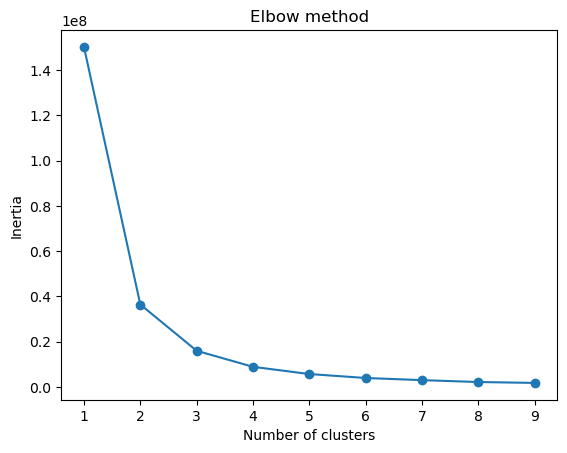

Train/validation: CLUSTERING COMPLETE.
------------------------------------------------------------------------------
8. data classification with KNN


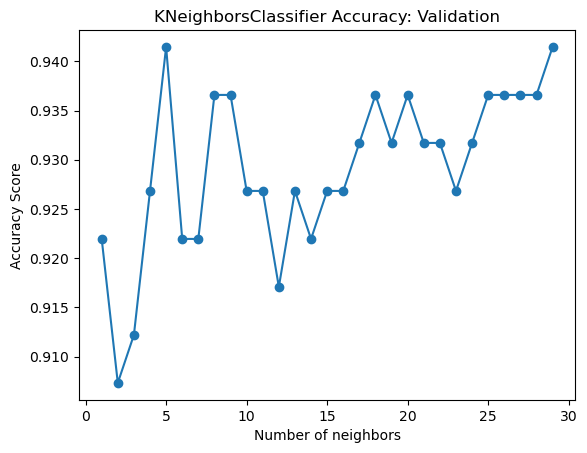

Mean accuracy scores:
[0.93873833 0.93873833 0.93390545 0.93873833 0.94370671 0.94738031
 0.93514002 0.94616079 0.94984944 0.94862993 0.94497139 0.94862993
 0.94492623 0.94614574 0.94859982 0.94980428 0.95227341 0.95225836
 0.94856971 0.95347787 0.95227341 0.95471244 0.95102379 0.95593195
 0.955947   0.95718157 0.95468232 0.95591689 0.95344776 0.95468232
 0.94855465 0.95100873 0.95222824 0.95590184 0.94977416 0.9522433
 0.95099368 0.95344776 0.95099368 0.95222824 0.95222824 0.95590184
 0.95468232 0.95344776 0.95344776 0.95712135 0.95344776 0.9571364
 0.95221319 0.95712135 0.95346281 0.95346281 0.95590184 0.95957543
 0.95835592 0.95960554 0.96082505 0.96084011 0.96082505 0.96084011]
Best accuracy score: 0.960840108401084
Best parameters: {'n_neighbors': 29, 'weights': 'distance'}
Accuracy of validation clustering: 0.9365853658536586
Test: CLUSTERING COMPLETE.
------------------------------------------------------------------------------
9. save final datasets to be passed onto model tra

In [ ]:
group_predictions, all_predictions, all_fitted_models = test_data_prediction(train, test)